<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Face_Detection_Using_Integral_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face detection using integral images is a key part of the Haar feature-based cascade detection process. Below is Python code to manually compute an integral image and use it for face detection. OpenCV's built-in detectMultiScale method typically abstracts this process, but this example demonstrates the principle.

1. Import libaries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Compute integral image function

In [10]:
def compute_integral_image(image):
    """
    Computes the integral image for the given input image.

    Args:
        image: Input grayscale image (NumPy array).

    Returns:
        Integral image.
    """
    integral_image = np.zeros_like(image, dtype=np.int32)
    rows, cols = image.shape

    for y in range(rows):
        for x in range(cols):
            integral_image[y, x] = (
                image[y, x]
                + (integral_image[y - 1, x] if y > 0 else 0)
                + (integral_image[y, x - 1] if x > 0 else 0)
                - (integral_image[y - 1, x - 1] if y > 0 and x > 0 else 0)
            )
    return integral_image

3. Detect faces function

In [11]:
def detect_faces_with_integral_image(image_path, cascade_path="haarcascade_frontalface_default.xml"):
    """
    Detect faces using Haar features and integral images.

    Args:
        image_path: Path to the input image.
        cascade_path: Path to the Haar cascade XML file (default: frontal face).

    Returns:
        Image with detected faces.
    """
    # Load Haar cascade and image
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute integral image
    integral_image = compute_integral_image(gray_image)

    # Detect faces using OpenCV's Haar cascade (uses integral image internally)
    faces = face_cascade.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
    )

    # Draw rectangles for detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    return image, integral_image, faces

4. Load and process the image

In [12]:
image_path = "/women.jpg"
output_image, integral_image, detected_faces = detect_faces_with_integral_image(image_path)

5. Display the results

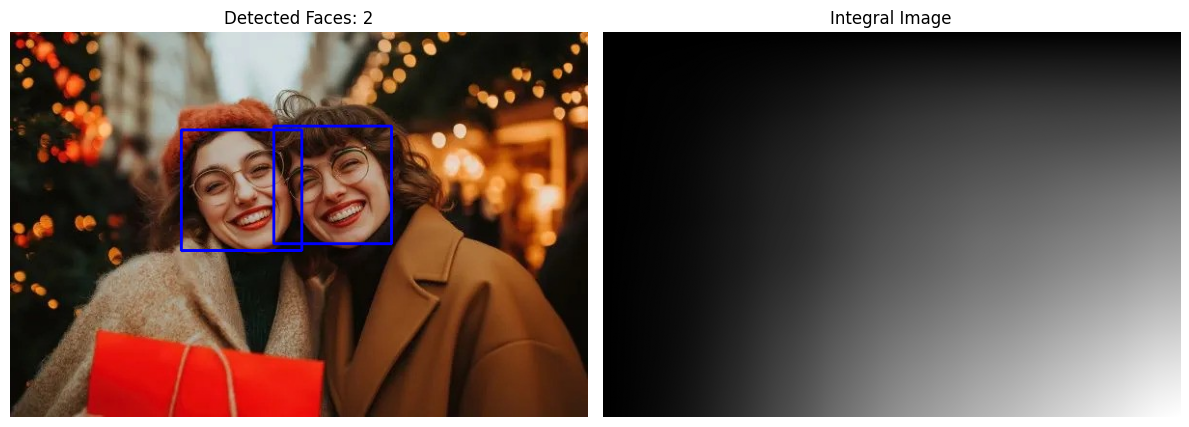

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Faces: {len(detected_faces)}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(integral_image, cmap="gray")
plt.title("Integral Image")
plt.axis("off")

plt.tight_layout()
plt.show()

6. Save the output image

In [14]:
cv2.imwrite("integral_faces_detected.jpg", output_image)

True